# import library

In [1]:
import numpy as np
import cv2
#%matplotlib notebook
from matplotlib import pyplot as plt
print(cv2.__version__)

4.9.0


# 基礎設定影像門檻值 (二值化影像 : Binary Image)

In [ ]:
img = cv2.imread('data/gradient.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Convert to True or False manually
binary = (gray > 127)
plt.imshow(gray, cmap = 'gray')
plt.show()
plt.imshow(binary, cmap = 'gray')
plt.show()

# 影像二值化函式

return threshold : 127.0


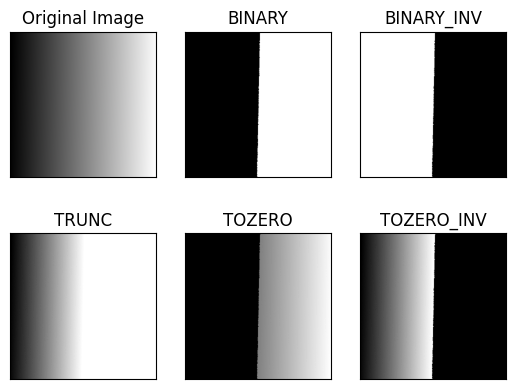

In [2]:
img = cv2.imread('data/gradient.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Threshold = 127
maxval = 255
# thresh1 is two-dimensional array
ret, thresh1 = cv2.threshold(gray, Threshold, maxval, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, Threshold, maxval, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, Threshold, maxval, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, Threshold, maxval, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, Threshold, maxval, cv2.THRESH_TOZERO_INV)

print("return threshold :",ret)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    #cv2.imwrite('Binary/'+titles[i]+'.png',images[i])
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


# 利用Track Bar 調整門檻值，觀察影像的變化
![](data/threshold.PNG)

In [ ]:
import numpy as np
import cv2
#%matplotlib notebook
from matplotlib import pyplot as plt
#建立回调函数
def changeThreshold(x):
    Threshold = cv2.getTrackbarPos('Weight','image')
    ret, thresh1 = cv2.threshold(gray, Threshold, maxval, cv2.THRESH_BINARY)
    #ret,thresh2=cv2.threshold(gray,Threshold,maxval,cv2.THRESH_BINARY_INV)
    #ret,thresh3=cv2.threshold(gray,Threshold,maxval,cv2.THRESH_TRUNC)
    #ret,thresh4=cv2.threshold(gray,Threshold,maxval,cv2.THRESH_TOZERO)
    #ret,thresh5=cv2.threshold(gray,Threshold,maxval,cv2.THRESH_TOZERO_INV)
    # Adjust size of array
    img2[:y1, x1:x1*2] = thresh1[:y1, :x1]
    cv2.imshow('image',img2)
#建立一影像
img = cv2.imread('data/gradient.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

y1 = gray.shape[0]
x1 = gray.shape[1]
img2 = np.zeros([y1, x1*2], np.uint8)
img2[:y1, :x1] = gray[:y1, :x1]
print(img2.shape)

maxval = 255
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
#cv2.imshow('image',img2)
cv2.createTrackbar('Weight', 'image', 0, 255, changeThreshold)
while(True):
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()

# 自動閾值法 (Otsu’s二值化)

In [ ]:
img = cv2.imread('data/sudoku.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.hist(gray.ravel(),256)
plt.show()

Threshold = 255
maxval = 255
ret,thresh1 = cv2.threshold(gray, Threshold, maxval, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret,thresh2 = cv2.threshold(gray, Threshold, maxval, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ret,thresh3 = cv2.threshold(gray, Threshold, maxval, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)
ret,thresh4 = cv2.threshold(gray, Threshold, maxval, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)
ret,thresh5 = cv2.threshold(gray, Threshold, maxval, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU)
print("return threshold :",ret)
print("-"*80)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    #cv2.imwrite('data/'+titles[i]+'.png',images[i])
    print(titles[i])
    plt.imshow(images[i],'gray')
    plt.show()
plt.show()
####### plt.show 即使最大值不是255，顯示的圖還是會用0~255顯示

# 自適應二值化
自適應二值化與單一值二值化不同，自適應二值化考慮了影像中不同區域的亮度差異，從而能夠處理光線變化和背景不均勻的情況。
#### 自適應二值化的主要原理以及流程如下：
1. 求出灰階影像f(x,y)的積分圖。
2. 求出核函數w(x,y)內元素的總和，並除以核函數的像素數量3x3=9，得到平均值1.1。
3. 計算出閾值Theshold，其中C是自訂的常數。假設C為0，Theshold等於1.1。
4. 對f(x,y)的錨(中心點)，依照上一步求出的閾值進行二值化。如果f(3,4)值超出1.1，輸出為255，反之輸出為0。

   
![](data/Adapt_md.png)

# 自適應二值化的函式 (Adaptive Thresholding)

## `cv2.adaptiveThreshold()`
它根據影像局部區域的特徵，自適應地設置二值化的門檻值。以下是該函式的主要參數及其說明：

- **src**: 輸入影像，必須是單通道的灰階影像
- **maxValue**: 應用於二值化後的最大值。門檻值操作後，如果像素值超過門檻值，這個參數會設定新的像素值
- **adaptiveMethod**: 自適應方法，決定如何計算局部門檻值。有兩種選擇：
  - `cv2.ADAPTIVE_THRESH_MEAN_C`: 基於局部區塊中像素值的均值計算門檻值。
  - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: 基於局部區塊中像素值的加權平均值（使用高斯加權）計算門檻值
- **thresholdType**: 二值化的類型。有兩種選擇：
  - `cv2.THRESH_BINARY`: 如果像素值`高於`門檻值，則設定為 maxValue；否則為 0
  - `cv2.THRESH_BINARY_INV`: 如果像素值`低於`門檻值，則設定為 maxValue；否則為 0
- **blockSize**: 決定計算門檻值的局部區塊的大小，必須是奇數。一般來說，較小的區塊可以檢測更多局部細節，而較大的區塊會讓影像更平滑
- **C**: 從局部區塊的均值或加權平均值中減去的常數，用於調整門檻值，使其更高或更低

範例：如果要對一個影像進行自適應二值化，採用GAUSSIAN加權的方法，<br>
最大值設定為 255，區塊大小為 11，並且閾值減去常數 2，你可以這樣使用：
```python
import cv2

# 假設 'image' 是一個灰度影像
binary_image = cv2.adaptiveThreshold(
    src=image,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=11,
    C=2
)
```
>  透過調整 `blockSize` 和 `C`，可以改變二值化的結果，從而找到最適合的設定。

In [ ]:
img = cv2.imread('data/sudoku.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
maxval = 255
blockSize = 11
Constant = 2
ret, th1 = cv2.threshold(gray, 97, maxval, cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(gray, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,blockSize,Constant) 

th3 = cv2.adaptiveThreshold(gray, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,blockSize,Constant) 
images = [gray, th1, th2,th3]
for i in range(4):
    #cv2.imwrite(str(i)+"test.png",images[i])
    plt.imshow(images[i],'gray')
    plt.show()

## 使用兩個滑動條，觀察THRESH_MEAN vs THRESH_GAUSSIAN

在這個例子中，我們使用兩個滑動條來調整二值化分割法的參數：
1. Type：選擇二值化方法
   > cv2.ADAPTIVE_THRESH_GAUSSIAN_C 與 cv2.ADAPTIVE_THRESH_MEAN_C
3. Kernel size：設定核的大小
   > **注意**：核的大小不能小於3，計算方式為 `kernel * 2 + 1`

![示例圖片](data/sudoku_md.png)

In [ ]:
import numpy as np
import cv2
#%matplotlib notebook
from matplotlib import pyplot as plt
#建立回调函数
def changeThreshold(x):
    mode = cv2.getTrackbarPos('Mode:','image')
    kernel = cv2.getTrackbarPos('Kernel:','image')
    #判斷Kernel條件：kernel size小於3都等於3(設定:實際kernel = kernel*2+1)
    if kernel <= 1: 
        kernel = 3
    else:
         kernel = kernel * 2+1
    
    #判斷方法條件：
    #當mode = 1， cv2.ADAPTIVE_THRESH_GAUSSIAN_C
    #當mode = 0，cv2.ADAPTIVE_THRESH_MEAN_C
    if mode == 1:
        print("THRESH_GAUSSIA with K=",end=" ")
        thresh1 = cv2.adaptiveThreshold(gray, maxval,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,kernel*2+1,2)
    else:
        print("THRESH_MEAN with K=",end=" ")
        thresh1 = cv2.adaptiveThreshold(gray, maxval,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,kernel*2+1,2)
    print(kernel)
    img2[:y1, x1:x1*2] = thresh1[:y1, :x1]
    cv2.imshow('image',img2)
#建立一影像
img = cv2.imread('data/sudoku.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

y1 = gray.shape[0]
x1 = gray.shape[1]
img2 = np.zeros([y1, x1*2], np.uint8)
img2[:y1, :x1] = gray[:y1, :x1]
print(img2.shape)

maxval = 255
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
#cv2.imshow('image',img2)
cv2.createTrackbar('Mode:','image',0,1,changeThreshold)
cv2.createTrackbar('Kernel:','image',1,20,changeThreshold)
while(True):
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()

# 自適應二值化的應用

#### 文檔影像二值化

> 廣泛應用於文件影像處理，能將掃描或拍照的文件轉換為二進位形式，這對文字擷取和識別至關重要。

#### 不同照明條件下的物體偵測

> 在不同光照條件下的影像處理中表現出色。它可以根據局部區域的光照變化進行調整，因此在具有挑戰性的環境中進行穩健的物體偵測。

#### 醫學影像分析

> 在醫學影像中，自適應閾值能根據強度和對比度的變化幫助分割感興趣的區域，例如腫瘤或異常部位。

#### 機器人與電腦視覺

> 在機器人和電腦視覺應用中對於障礙物偵測和導航等任務非常重要，特別是在動態環境中。

#### 臉部辨識和生物辨識

> 臉部辨識系統通常使用自適應閾值處理來應對光照和臉部表情的變化，從而提高特徵提取的準確性。